# Hand-written digit classification 
### Loading the MNIST dataset + imports

In [19]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
print(train_images.shape) # 6000 training samples
print(test_labels) # 1, 2, .... 10

(60000, 28, 28)
[7 2 1 ... 4 5 6]


## 1) Using a densly connected model

### Instantiating the model

In [21]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax')) 

### Compilation and data preparation 

In [22]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [23]:
train_images = train_images.reshape((60000, 28 * 28)) # 2D image to vector
train_images = train_images.astype('float32') / 255 # normalize (model works best with smaller values)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [24]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Training

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 12s 199us/step - loss: 0.2573 - accuracy: 0.9258
Epoch 2/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.1039 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0684 - accuracy: 0.9799
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0493 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0364 - accuracy: 0.98951s - loss: 0.0368 - accura


### Evaluating the model on the test dataset

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 64us/step
test_acc: 0.9817000031471252


## 2) Using a convolultion neural network
### Instantiation of a small covnet

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, # number of channels
                        (3, 3), activation='relu', input_shape=(28, 28, 1))) # tensor input shape!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Now we need to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network similar to the example above.

In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

**The Border effect, padding and strides**:

Note, we go from 28x28 to 26x26 in the first layer. This is an example of the border effect. Because each convolutional window needs to be *centred* around every input tile, the dimensions of the input shrinks and we move deeper into the net. If we wanted an output feature map with the same spatial dimensions as the
input, we would have to use *padding*. 

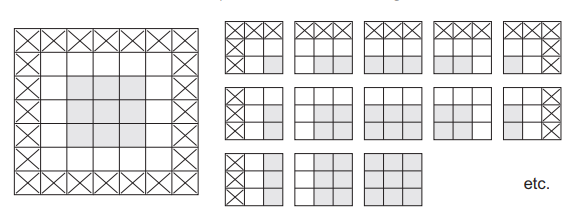

Padding can be activated by making the padding argument *same* (as opposed to *valid*, which is the default). Essentially, padding  makes it possible to fit center convolution windows around every input tile, by adding additional rows and columns to the input. 

The distance between two successive windows is a parameter of the
convolution, called its *stride*, which defaults to 1. Clearly, this will also alter the dimension of the output. 

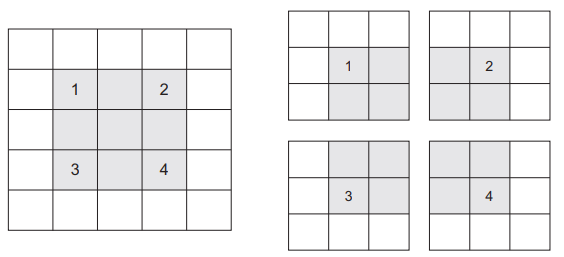

Here, given a 25x25 input, we have 3x3 convolutional patches extracted with a 2x2 stride (no padding). Covnets with stride greater than 1 are only useful for a small selection of problems. To downsample the feature maps, we use the *max_pooling* operation instead. 

**Max-pooling**

Notice that after the *max_pooling* layer, we go from 26x26 to 13*13. The feature map is halved in size! Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel (You could also do min_pooling or average_pooling but these are less effective). A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2 (hence why the feature map size becomes halved).

### Importing / preparing data, training and evalutation 

In [37]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 54s 897us/step - loss: 0.1745 - accuracy: 0.9449
Epoch 2/5
60000/60000 [==============================] - 51s 849us/step - loss: 0.0463 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 52s 866us/step - loss: 0.0319 - accuracy: 0.9903
Epoch 4/5
60000/60000 [==============================] - 51s 845us/step - loss: 0.0239 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 52s 861us/step - loss: 0.0181 - accuracy: 0.9943


In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc) # Clearly an improvement.

10000/10000 [==============================] - 2s 239us/step
0.9896000027656555


### Reason for the difference in accuracy 
Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn
local patterns. Consequently,
* The patterns they learn are translation invariant. 
* They can learn spatial hierarchies of patterns
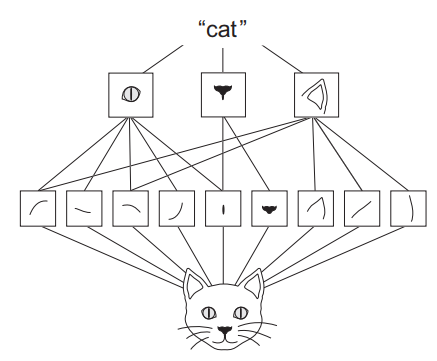

Convolutions are defined by two key parameters:

* Size of the patches extracted from the inputs—These are typically 3 × 3 or 5 × 5. In the example, they were 3 × 3, which is a common choice.
* Depth of the output feature map—The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.


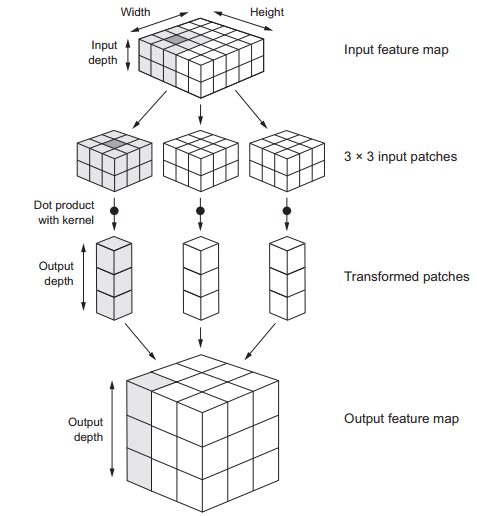
